<a href="https://colab.research.google.com/github/curtiscu/LYIT/blob/master/LYIT_Diss_MIDI_music21_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deeper testing of music21 MIDI Library

* https://web.mit.edu/music21/doc/index.html


# Data/ Files

Using this data...
* https://magenta.tensorflow.org/datasets/groove#download

Folders with files that look useful...

* /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session
* /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session
* /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer7/eval_session
* /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer8/eval_session

# Setup env

In [0]:
import pandas as pd

In [0]:
# print all cell output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session
! ls -al '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/'

total 35
-rw------- 1 root root 2589 Apr 27 12:01 10_soul-groove10_102_beat_4-4.mid
-rw------- 1 root root 4793 Apr 27 12:01 1_funk-groove1_138_beat_4-4.mid
-rw------- 1 root root 3243 Apr 27 12:01 2_funk-groove2_105_beat_4-4.mid
-rw------- 1 root root 4466 Apr 27 12:01 3_soul-groove3_86_beat_4-4.mid
-rw------- 1 root root 2551 Apr 27 12:01 4_soul-groove4_80_beat_4-4.mid
-rw------- 1 root root 3798 Apr 27 12:01 5_funk-groove5_84_beat_4-4.mid
-rw------- 1 root root 3760 Apr 27 12:01 6_hiphop-groove6_87_beat_4-4.mid
-rw------- 1 root root 1894 Apr 27 12:01 7_pop-groove7_138_beat_4-4.mid
-rw------- 1 root root 2437 Apr 27 12:01 8_rock-groove8_65_beat_4-4.mid
-rw------- 1 root root 3448 Apr 27 12:01 9_soul-groove9_105_beat_4-4.mid


In [5]:
!pip install music21

In [0]:
import music21
from music21 import *

# Load File

In [0]:

file_1 = '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid'

m21_file_1 = file_1

# load file...
midi_file_1 = converter.parse(m21_file_1)

## Quick peek at file..

In [9]:
for bit in midi_file_1[0]:
  print(bit)

<music21.tempo.MetronomeMark allegrissimo Quarter=138.0>
C major
<music21.meter.TimeSignature 4/4>
<music21.stream.Voice 0x7fbb4bfea518>
<music21.stream.Voice 0x7fbb4be86c50>
<music21.stream.Voice 0x7fbb4be0d438>
<music21.stream.Voice 0x7fbb4bda32e8>


In [10]:
# .. but looks like that precise time information is the same for nearly all notes?!
for n in midi_file_1[0][3]:
  print('Note: {}, vol: {}, secs: {}'.format(n, n.volume.velocity, n.seconds))

Note: <music21.chord.Chord G3 E-3 C2>, vol: 60, secs: 0.10869565217391304
Note: <music21.chord.Chord C2 E-3>, vol: 44, secs: 0.10869565217391304
Note: <music21.chord.Chord G#2 E-3 D2>, vol: 75, secs: 0.10869565217391304
Note: <music21.note.Note G#>, vol: 52, secs: 0.10869565217391304
Note: <music21.note.Note D>, vol: 33, secs: 0.10869565217391304
Note: <music21.note.Note G#>, vol: 77, secs: 0.10869565217391304
Note: <music21.note.Note D>, vol: 33, secs: 0.10869565217391304
Note: <music21.chord.Chord C2 E-3>, vol: 50, secs: 0.10869565217391304
Note: <music21.note.Note G#>, vol: 77, secs: 0.10869565217391304
Note: <music21.note.Note G#>, vol: 17, secs: 0.10869565217391304
Note: <music21.note.Note D>, vol: 30, secs: 0.10869565217391304
Note: <music21.note.Note G#>, vol: 72, secs: 0.10869565217391304
Note: <music21.note.Note G#>, vol: 60, secs: 0.10869565217391304
Note: <music21.chord.Chord G#2 D2 E-3>, vol: 75, secs: 0.10869565217391304
Note: <music21.note.Note G#>, vol: 67, secs: 0.10869

In [11]:
# text display of notes...
midi_file_1.show('text')

{0.0} <music21.stream.Part 0x7fbb4c072710>
    {0.0} <music21.tempo.MetronomeMark allegrissimo Quarter=138.0>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.stream.Voice 0x7fbb4bfea518>
        {0.0} <music21.chord.Chord G3 E-3 C2>
        {0.5} <music21.chord.Chord C2 E-3>
        {1.0} <music21.chord.Chord G#2 E-3 D2>
        {1.3333} <music21.note.Note G#>
        {1.75} <music21.note.Note D>
        {2.0} <music21.note.Note G#>
        {2.25} <music21.note.Note D>
        {2.5} <music21.chord.Chord C2 E-3>
        {3.0} <music21.note.Note G#>
        {3.3333} <music21.note.Note G#>
        {3.75} <music21.note.Note D>
        {4.0} <music21.note.Note G#>
        {4.3333} <music21.note.Note G#>
        {5.0} <music21.chord.Chord G#2 D2 E-3>
        {5.5} <music21.note.Note G#>
        {5.75} <music21.note.Note D>
        {6.0} <music21.chord.Chord G#2 E-3>
        {6.25} <music21.note.Note D>
        {6.5} <music21.note.Note E->

## Show measures

In [12]:
# .. as above, filtered to first 4 bars...
midi_file_1.measures(0, 4).show("text")

{0.0} <music21.stream.Part 0x7fbb4c120978>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.BassClef>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.stream.Voice 0>
            {0.0} <music21.chord.Chord G3 E-3 C2>
            {0.5} <music21.chord.Chord C2 E-3>
            {1.0} <music21.chord.Chord G#2 E-3 D2>
            {1.3333} <music21.note.Note G#>
            {1.75} <music21.note.Note D>
            {2.0} <music21.note.Note G#>
            {2.25} <music21.note.Note D>
            {2.5} <music21.chord.Chord C2 E-3>
            {3.0} <music21.note.Note G#>
            {3.3333} <music21.note.Note G#>
            {3.75} <music21.note.Note D>
        {0.0} <music21.stream.Voice 1>
            {0.0} <music21.note.Rest rest>
            {1.5} <music21.note.Note E->
            {1.5} <music21.note.Rest rest>
            {2.0} <music21.note.Note E->
            {2.3333} <music21.note.Note G#>
            {3.0} <music21.chord.Chord E-3 E2

## Graphical output

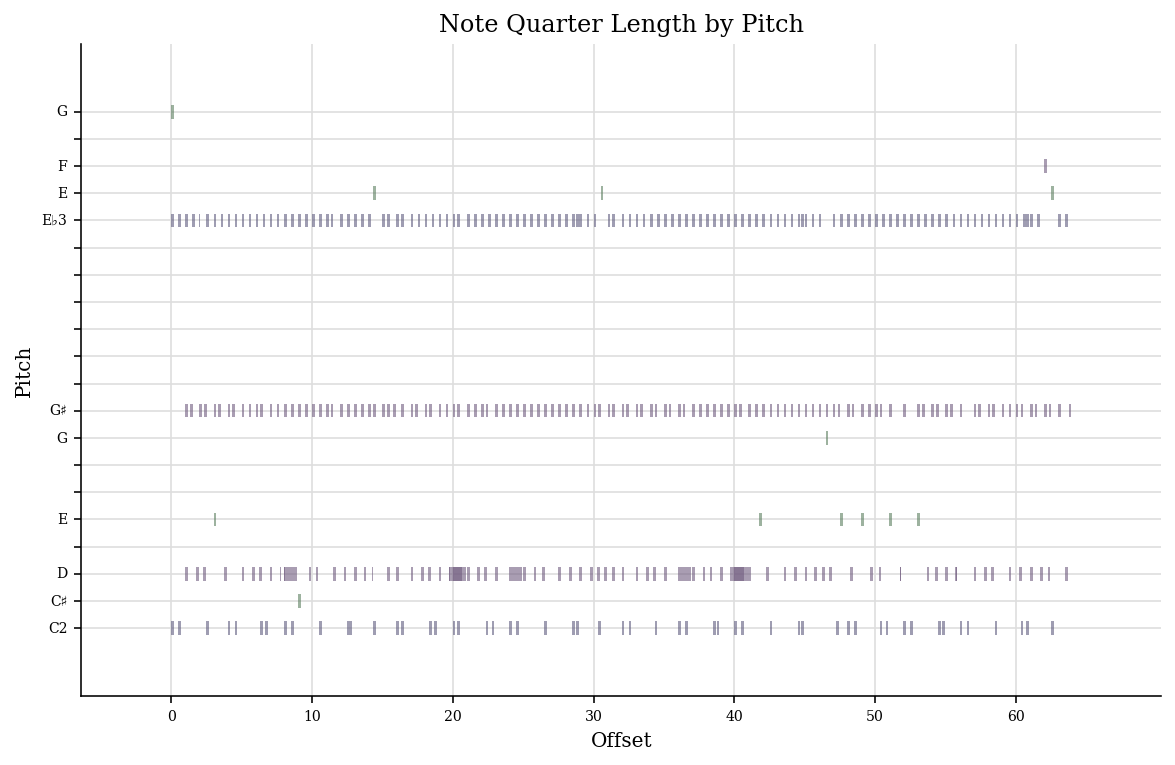

In [13]:
midi_file_1.plot('pianoroll')

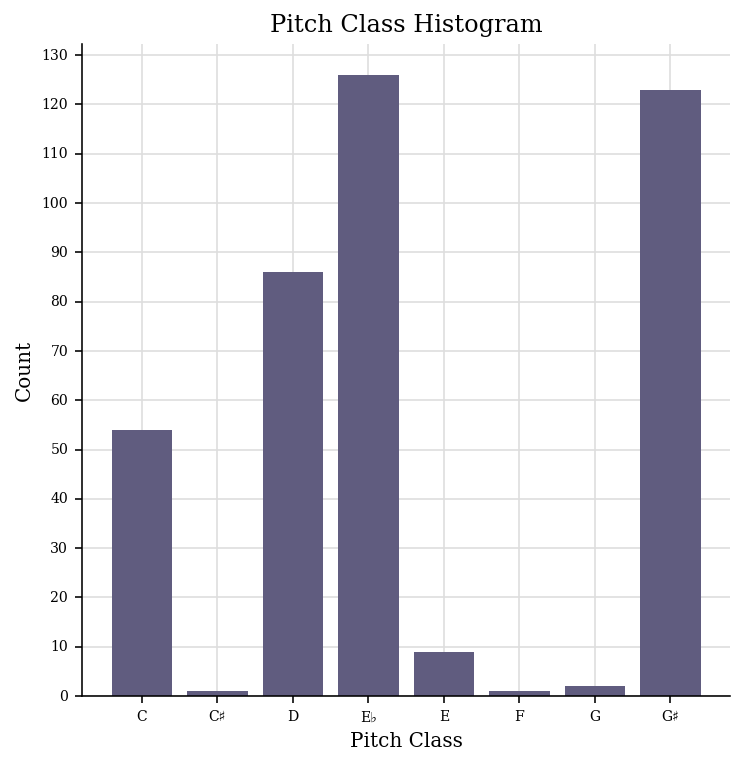

In [14]:
midi_file_1.plot('pitchclass')

## Check out the 'stream'

In [15]:
# this pulls all the notes out...
myRecIter = midi_file_1.recurse()
myRecIter.notes.elements

(<music21.chord.Chord G3 E-3 C2>,
 <music21.chord.Chord C2 E-3>,
 <music21.chord.Chord G#2 E-3 D2>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note G#>,
 <music21.chord.Chord C2 E-3>,
 <music21.note.Note G#>,
 <music21.chord.Chord E-3 E2>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note G#>,
 <music21.chord.Chord E-3 C2>,
 <music21.note.Note G#>,
 <music21.chord.Chord C2 E-3>,
 <music21.chord.Chord G#2 D2 E-3>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.chord.Chord G#2 E-3>,
 <music21.note.Note D>,
 <music21.chord.Chord C2 G#2>,
 <music21.note.Note E->,
 <music21.note.Note C>,
 <music21.chord.Chord D2 G#2 E-3>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note D>,
 <music21.chord.Chord G#2 C2 E-3>,
 <music21.note.Note D>,
 <music21.chord.C

# Event viewing

In [0]:
# util method

def pp_note(note):
  return 'key:{}, midi:{}, time:{}, quarterLength:{}'.format(note.pitch, note.pitch.midi, note.duration.fullName, note.duration.quarterLength)
  

In [18]:

pm = midi.percussion.PercussionMapper()

for note in myRecIter.notes.elements:
  try:
    print('{1} - {0}'.format(pp_note(note), pm.midiPitchToInstrument(note.pitch)))

  except AttributeError:
    # assume we have a chord...
    print('    TODO: chord?  {}, time:{}, quarterLength:{}'.format(note, note.duration.fullName, note.duration.quarterLength))
      
  except music21.midi.percussion.MIDIPercussionException:
    print('    TODO: remap?  {}'.format(pp_note(note)))


    TODO: chord?  <music21.chord.Chord G3 E-3 C2>, time:16th, quarterLength:0.25
    TODO: chord?  <music21.chord.Chord C2 E-3>, time:16th, quarterLength:0.25
    TODO: chord?  <music21.chord.Chord G#2 E-3 D2>, time:16th, quarterLength:0.25
Hi-Hat Cymbal - key:G#2, midi:44, time:16th, quarterLength:0.25
    TODO: remap?  key:E-3, midi:51, time:16th, quarterLength:0.25
Snare Drum - key:D2, midi:38, time:16th, quarterLength:0.25
Hi-Hat Cymbal - key:G#2, midi:44, time:16th, quarterLength:0.25
    TODO: remap?  key:E-3, midi:51, time:Zero, quarterLength:0.0
Snare Drum - key:D2, midi:38, time:16th, quarterLength:0.25
Hi-Hat Cymbal - key:G#2, midi:44, time:16th, quarterLength:0.25
    TODO: chord?  <music21.chord.Chord C2 E-3>, time:16th, quarterLength:0.25
Hi-Hat Cymbal - key:G#2, midi:44, time:16th, quarterLength:0.25
    TODO: chord?  <music21.chord.Chord E-3 E2>, time:16th, quarterLength:0.25
Hi-Hat Cymbal - key:G#2, midi:44, time:16th, quarterLength:0.25
    TODO: remap?  key:E-3, midi:

# music21.midi.MidiFile object

In [0]:
mf_1 = midi.MidiFile()

mf_1.open(file_1, attrib='rb')
mf_1.read()


## show raw events

In [20]:
for e in mf_1.tracks[0].events:
  print(e)

<MidiEvent DeltaTime, t=0, track=0, channel=None>
<MidiEvent SEQUENCE_TRACK_NAME, t=None, track=0, channel=None, data=b'MIDI'>
<MidiEvent DeltaTime, t=0, track=0, channel=None>
<MidiEvent INSTRUMENT_NAME, t=None, track=0, channel=None, data=b'Brooklyn'>
<MidiEvent DeltaTime, t=0, track=0, channel=None>
<MidiEvent TIME_SIGNATURE, t=None, track=0, channel=None, data=b'\x04\x02\x18\x08'>
<MidiEvent DeltaTime, t=0, track=0, channel=None>
<MidiEvent KEY_SIGNATURE, t=None, track=0, channel=None, data=b'\x00\x00'>
<MidiEvent DeltaTime, t=0, track=0, channel=None>
<MidiEvent SMTPE_OFFSET, t=None, track=0, channel=None, data=b'!\x00\x00\x00\x00'>
<MidiEvent DeltaTime, t=0, track=0, channel=None>
<MidiEvent SET_TEMPO, t=None, track=0, channel=None, data=b'\x06\xa2_'>
<MidiEvent DeltaTime, t=3, track=0, channel=None>
<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=55, velocity=60>
<MidiEvent DeltaTime, t=4, track=0, channel=None>
<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=51, v

## filter events, examine timings

In [21]:
total_note_ons = 0
delta_time = 0

for e in mf_1.tracks[0].events:
  if e.isDeltaTime():
    delta_time += e.time

  if e.isNoteOn():
    total_note_ons += 1
    print(e, 'time: {}'.format(delta_time))


print('total_note_ons: {}'.format(total_note_ons))

<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=55, velocity=60> time: 3
<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=51, velocity=55> time: 7
<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=36, velocity=64> time: 10
<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=36, velocity=57> time: 211
<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=51, velocity=31> time: 238
<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=44, velocity=77> time: 446
<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=51, velocity=54> time: 467
<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=38, velocity=93> time: 475
<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=44, velocity=52> time: 666
<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=51, velocity=42> time: 704
<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=38, velocity=33> time: 828
<MidiEvent NOTE_ON, t=None, track=0, channel=10, pitch=44, velocity=77> time: 908
<MidiEvent NOTE_ON, t

I've checked the above cross referenced against timings from MIDO library and a quick visual (start and end events) makes it look like they appear to match timings.